# &laquo;Машинное обучение&raquo;, AI Masters

### Домашняя работа №2. Pandas, Matplotlib, Seaborn.

In [247]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import display



In [ ]:
# recommended: add your own rcparams here

## Блок 1. Воспроизведение графиков (6 баллов)

Дополнительные баллы можно получить при очень точном воспроизведении графиков.

Disclaimer: Не все графики в этом блоке имеют глубокий смысл. Скорее они призваны дать вам увидеть "а как еще можно". Надеюсь, что процесс их воспроизведения будет для вас полезен ;)

### Задача 1.0 (0 баллов)

Загрузите датасет в Pandas.

На основе этого датасета вам необходимо будет построить графики в заданиях блока 1.

In [2]:
!wget https://data.bioml.ru/htdocs/courses/python/datasci/pandas/data/winemag-data-130k-noreview-v2.csv -O winemag-data-noreview.csv

--2025-10-02 11:57:52--  https://data.bioml.ru/htdocs/courses/python/datasci/pandas/data/winemag-data-130k-noreview-v2.csv
Resolving data.bioml.ru (data.bioml.ru)... 188.120.231.217
Connecting to data.bioml.ru (data.bioml.ru)|188.120.231.217|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18477761 (18M) [text/csv]
Saving to: ‘winemag-data-noreview.csv’

winemag-data-norevi 100%[===================>]  17.62M  5.40MB/s    in 3.3s    

2025-10-02 11:57:55 (5.40 MB/s) - ‘winemag-data-noreview.csv’ saved [18477761/18477761]



In [248]:
df = pd.read_csv("winemag-data-noreview.csv")

In [249]:
display(df.columns)
display(df.head(5))
print(df.index[-1])

Index(['country', 'designation', 'points', 'price', 'province', 'region_1',
       'region_2', 'taster_name', 'taster_twitter_handle', 'title', 'variety',
       'winery'],
      dtype='object')

,country,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


119899


### Задача 1.1 (0.5 балла)

Напишите код, который воспроизводит график:

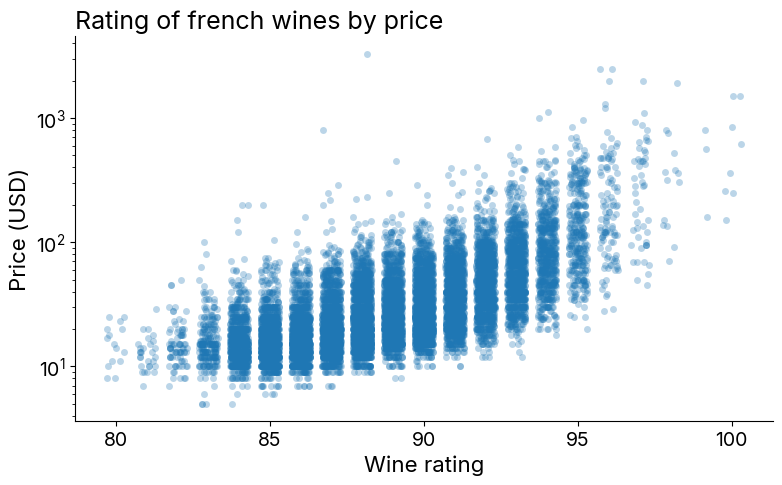

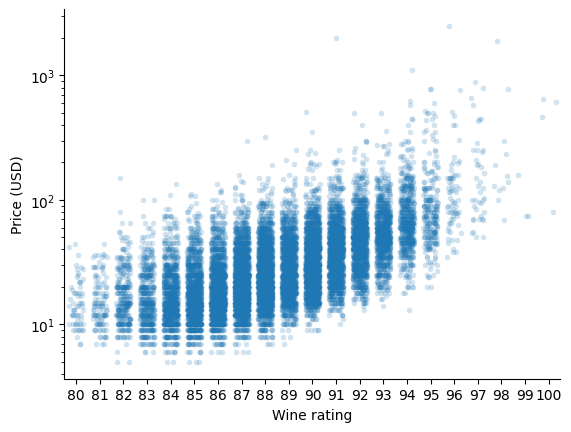

In [250]:
# fig, ax = plt.subplots()

sample = df.sample(20000)
ax = sns.stripplot(data = sample, x="points", y="price", alpha = 0.2, jitter = 0.3, size = 4)
ax.set_yscale("log")
ax.set_xlabel("Wine rating")
ax.set_ylabel("Price (USD)")
ax.spines[['top', 'right']].set_visible(False)
# plt.show()

### Задача 1.2 (0.5 балла)

Напишите код, который воспроизводит график:

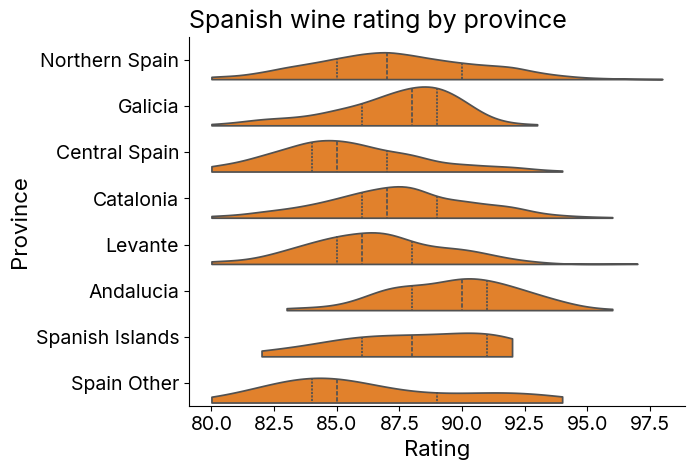

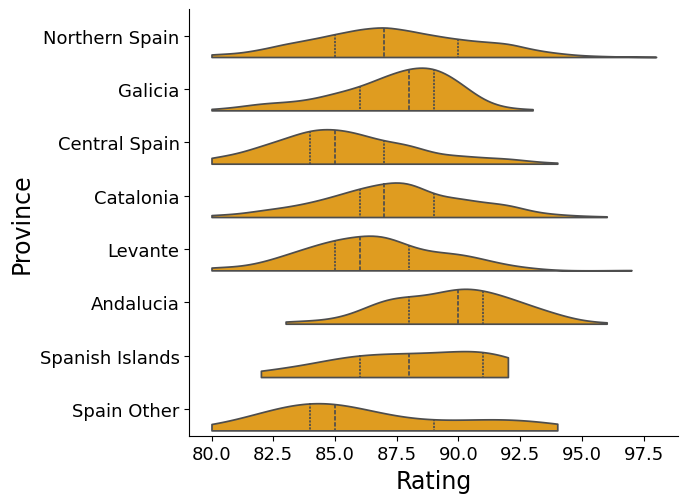

In [251]:
graph = sns.catplot(data = df[df['country'] == "Spain"], x = 'points', y='province', kind='violin', split = True, inner = 'quart', color = 'orange', cut = 0, aspect = 1.3)
graph.tick_params(axis='both', labelsize=13)
graph.set_ylabels("Province", fontsize = 17)
graph.set_xlabels("Rating", fontsize = 17)
graph.set_titles("Spanish wine")

### Задача 1.3 (1 балл)

Напишите код, который воспроизводит график:

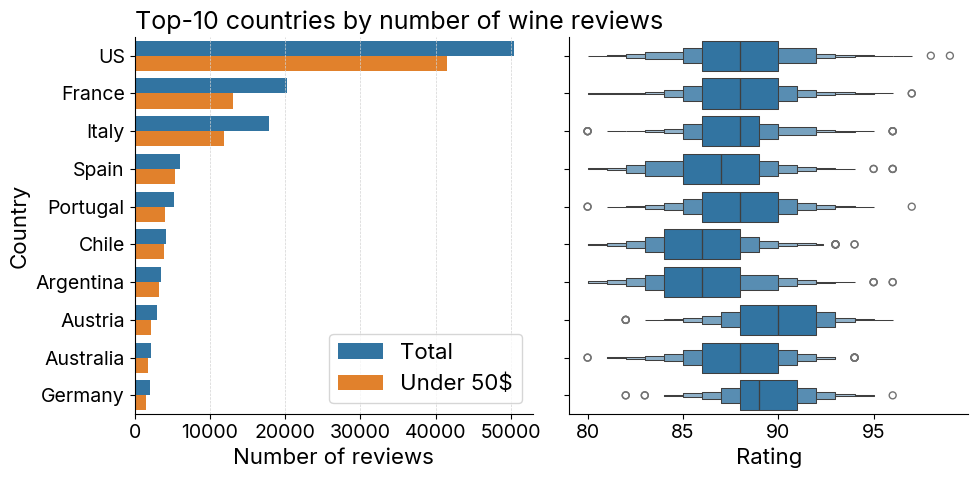

In [252]:
dfcopy = df.copy()
under50df = dfcopy[dfcopy.price < 50]
dfcopy['under50'] = "Total"
under50df['under50'] = "Under 50$"
fulldf = pd.concat([dfcopy,under50df], ignore_index = True)
top10Countries = df.country.value_counts().index[0:10]
total = df.country.value_counts()[top10Countries]
under50 = df[df.price < 50].country.value_counts()[top10Countries]

/tmp/ipykernel_988426/2416583775.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  under50df['under50'] = "Under 50$"


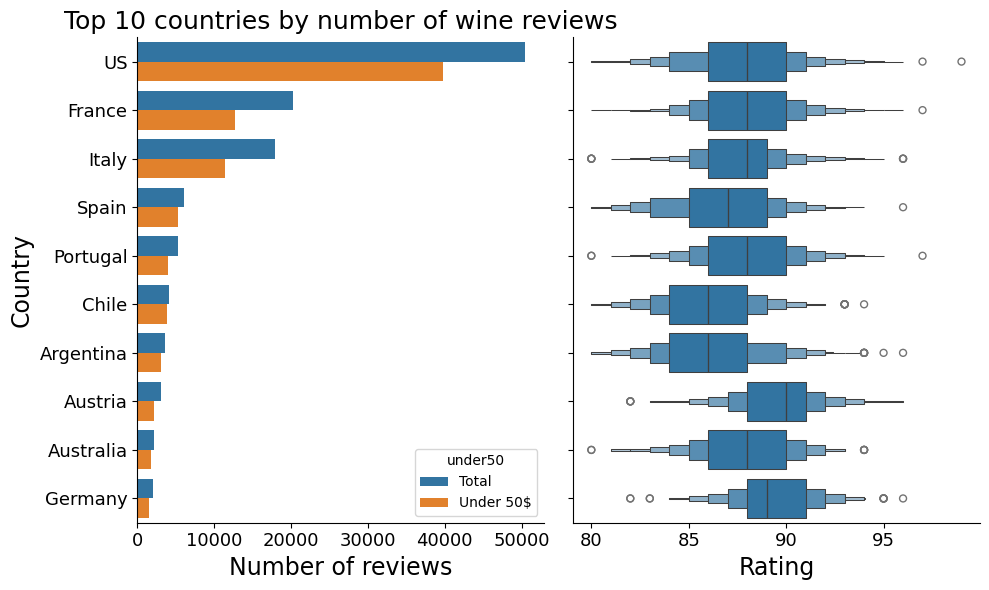

In [253]:
fig, ax = plt.subplot_mosaic('ab')
graph1 = sns.countplot(data = fulldf, y = 'country', order = top10Countries, hue = 'under50', ax = ax['a'])
graph2 = sns.boxenplot(data = under50df, y = 'country', x = 'points', order = top10Countries, ax = ax['b'])
graph1.tick_params(axis='both', labelsize=13)
graph2.tick_params(axis='both', labelsize=13)
graph1.set_xlabel("Number of reviews", fontsize = 17)
graph1.set_ylabel("Country", fontsize = 17)
graph2.set_xlabel("Rating", fontsize = 17)
graph2.set_ylabel("")
graph1.set_title("Top 10 countries by number of wine reviews", fontsize=18)
ax['b'].get_yaxis().set_ticklabels([])
ax['b'].spines[['top', 'right']].set_visible(False)
ax['a'].spines[['top', 'right']].set_visible(False)
fig.set_size_inches(10, 6)
fig.tight_layout()
plt.show()

### Задача 1.4 (1.5 балла)

Напишите код, который воспроизводит график:

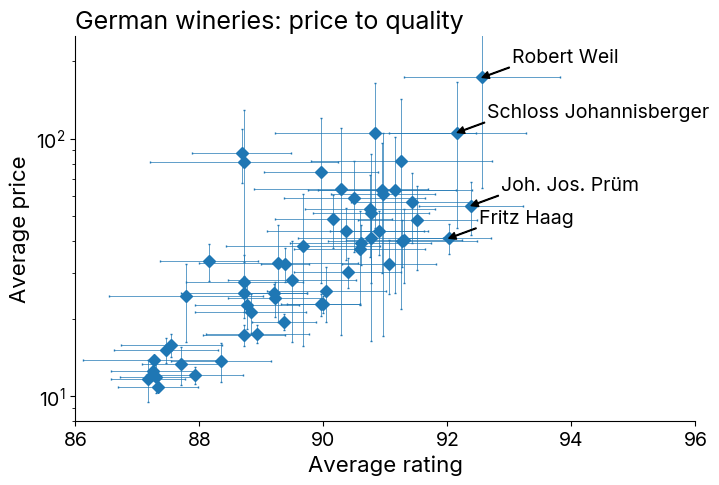

**Указание**: точки - средние, "усы" - стандартные отклонения. Взяты только винодельни с 10 или более отзывами в датасете.

### Задача 1.5 (1.5 балла)

Напишите код, который воспроизводит график:

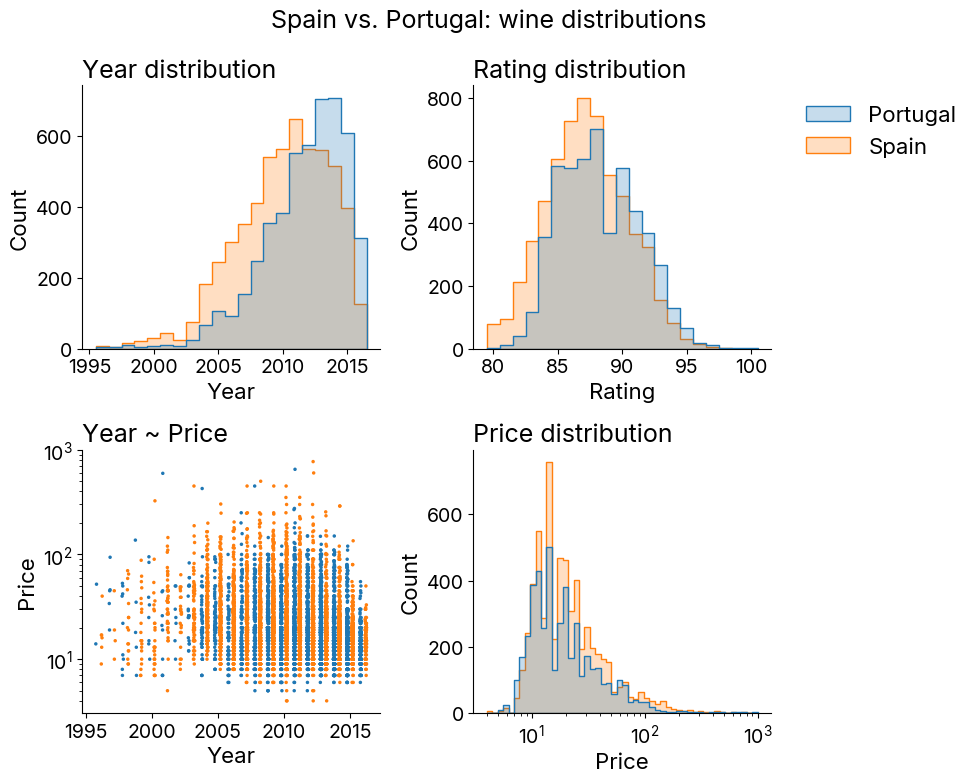

**Указание**: год получен по данным датасета с помощью средств Pandas. Годы вне диапазона [1996, 2016] считаются неизвестными.

In [254]:
df['year'] =  pd.to_numeric(df['title'].str.extract(r'(\d{4})')[0])
portugal = df[df['country'] == 'Portugal']
spain = df[df['country'] == 'Spain']
portSpain = pd.concat([portugal,spain], ignore_index = True)
portSpain = portSpain[portSpain.year >= 1995]

Text(0.5, 0.98, 'Spain vs. Portugal: wine distributions')

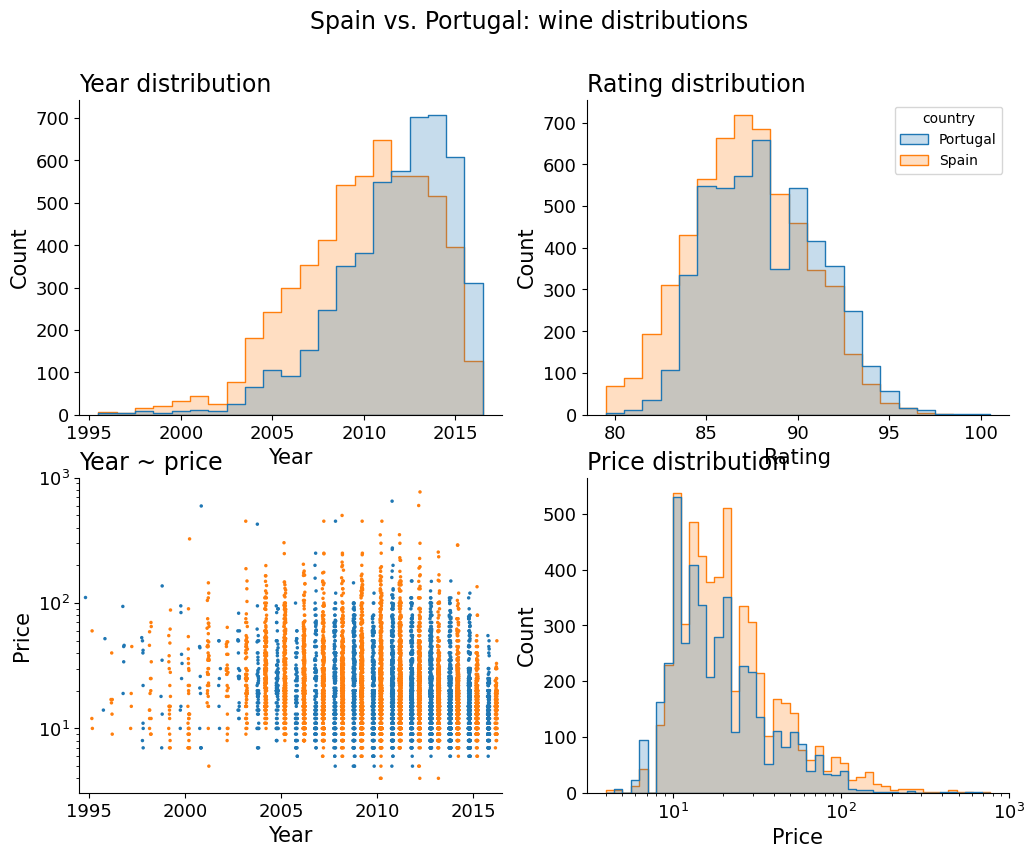

In [255]:
fig, ax = plt.subplot_mosaic([['A', 'B'],
     ['C','D']])
sns.histplot(portSpain, x = 'points', hue = 'country', element='step', binwidth=1,binrange= [79.5,100.5], ax = ax['B'])
sns.histplot(portSpain, x = 'year', hue = 'country', element='step', binwidth=1,binrange= [1995.5,2016.5], ax = ax['A'], legend=False)
sns.stripplot(portSpain, x = 'year', y = 'price', hue = 'country', size = 2.5, dodge = True,ax=ax['C'], legend=False)
sns.histplot(portSpain, x = 'price', log_scale=True, hue='country', element='step', binwidth=0.05, ax = ax['D'], legend=False)
ax['C'].set_yscale("log")
ax['C'].set_xticks([0,5,10,15,20])
ax['C'].set_xticklabels([1995,2000,2005,2010,2015])
ax['A'].spines[['top', 'right']].set_visible(False)
ax['B'].spines[['top', 'right']].set_visible(False)
ax['C'].spines[['top', 'right']].set_visible(False)
ax['D'].spines[['top', 'right']].set_visible(False)

ax['A'].set_xlabel("Year", fontsize=15)
ax['B'].set_xlabel("Rating", fontsize=15)
ax['C'].set_xlabel("Year", fontsize=15)
ax['D'].set_xlabel("Price", fontsize=15)

ax['A'].set_ylabel("Count", fontsize=15)
ax['B'].set_ylabel("Count", fontsize=15)
ax['C'].set_ylabel("Price", fontsize=15)
ax['D'].set_ylabel("Count", fontsize=15)

ax['A'].set_title("Year distribution", fontsize = 17,loc= 'left')
ax['B'].set_title("Rating distribution", fontsize = 17,loc= 'left')
ax['C'].set_title("Year ~ price", fontsize = 17,loc= 'left')
ax['D'].set_title("Price distribution", fontsize = 17,loc= 'left')

ax['A'].tick_params(axis='both', labelsize=13)
ax['B'].tick_params(axis='both', labelsize=13)
ax['C'].tick_params(axis='both', labelsize=13)
ax['D'].tick_params(axis='both', labelsize=13)

fig.set_size_inches(12, 9)
fig.suptitle('Spain vs. Portugal: wine distributions', fontsize = 17)

### Задача 1.6 (1 балл)

Напишите код, который воспроизводит график:

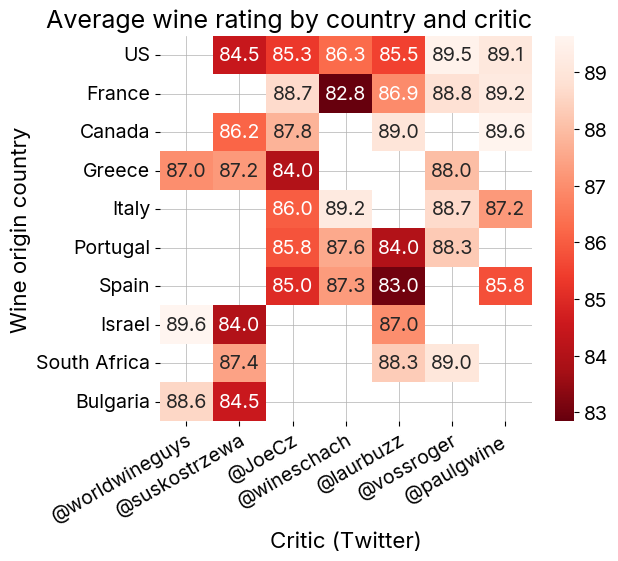

**Указание**: взяты не все страны и критики <font color='lightgray'>(были выбраны критики, которые оценивали наибольшее количество стран, а затем выбраны страны, вино из которых оценивали наибольшее число выбранных критиков, но можно просто выбрать страны и критиков так же, как на картинке)</font>

В ячейках указан средный рейтинг (`points`), выданный критиком винам из определенной страны.

## Блок 2. **Tool**: информация о колонках датафрейма (4 балла)

#### чтобы получить полный балл, нужно прикрепить ваш правильно работающий пример в отдельном окошке

### Несколько слов про tool-блоки в домашках

Классного датасаентиста помимо всего прочего отличает его "портфель" - набор готового кода на все случаи жизни,
    который он носит с собой где бы он ни работал и какую бы домашку не делал. Во время различных профессиональных занятий
    всегда хорошо сохранить функцию, которая помогла вам сейчас решить конкретную задачу себе "в папочку", чтобы столкнувшись
    с такой / похожей задачей дальше, иметь под рукой oneliner, который сделает все так, как вам хочется.
    
Время от времени в ваших домашках будут появляться tool-блоки, в которых мы будем просить вас написать что-нибудь, что вам
    пригодится в дальнейшем, а также закрепляет пройденный материал.
    Настоятельно рекомендуем завести себе хранилище, куда вы будете складывать функции из домашек,
    а также те, которые напишете сами и сочтете достойными.

В дальнейшем вы сможете импортировать ваши функции в любой проект, например, так:

```
import sys
sys.path.append('/*SOME_PATH*/my_code/my_utils')
from utils.plot import plot_denisty
```

<br/>
Скорее всего, со временем вы захотите дополнить / исправить / переделать под себя эти функции, и это правильно,
    однако в домашках нужно сделать ровно то, что написано в задании - ни больше, ни меньше. Все остальное - уже самостоятельно.
    Можно воспринимать функции из домашек как шаблоны, вдохновляющие вас на дальнейшее творчество.
    Чтобы вы в будущем могли разобраться, что происходит у вас в коде (а тем более - проверяющие), мы будем просить вас писать
    комментарии к вашему коду и докстринги (пример ниже). Это несложная и очень полезная привычка, которая не раз выручит вас.

Условия проверки tool-блоков:
- Если какая-то часть задания не реализована или вы сделали что-то запрещенное, вы получаете 0 баллов за задачу
- Если сделано все, что описано в задании и не сделано ничего запрещенного, есть docstring и комментарии к коду,
    вы получаете полный балл за задачу
- После получения полного балла, могут быть вычтены баллы за любого рода неадекватность. Размер штрафа субъективен
    и коррелирует с масштабом неадекватности - на что-то можно закрыть глаза, на что-то не получится.
- Вспомогательные принты и любые следы тестирования - неадекватность
- Неадекватностью может являться кривое выполнение пункта задания, однако если мы посчитаем пункт кривым,
    это не значит, что у вас 0 за задачу. Не сделать и сделать неправильно - разные вещи
- Некоторые советы и намеки на то, что считается адекватным для конкретной задачи, можно будет найти в задании :)

### Задача 2.1 (4 балла)

Напишите функцию `get_df_info`, которая будет выводить информацию о колонках входного датафрейма. Функция должна возвращать датафрейм следующего формата:

- индекс - все колонки входного датафрейма


- в колонках результирующего датафрейма содержится следующая информация (см. пример ниже):
    - тип данных
        - используйте `df.col.dtype.name`, это стабильнее, чем `df.col.dtype`
    - количество уникальных элементов
        - включая наны
    - доля нанов в колонке
    - доля нулей в колонке
    - доля пустых строк в колонке
    - доля самого частовстречаемого элемента в колонке + сам этот элемент (aka `vc_max`)
        - исключая наны
        - в одной колонке или в двух разных - решать вам
        - если таких несколько - можно брать любой
        
    - два разных примера содержимого колонки
        - исключая наны
        - в одной колонке или в двух разных - решать вам
        
    - `trash_score` колонки: max([суммарная доля нанов, нулей и пустых строк], [`vc_max`.доля if `vc_max`.доля > thr else 0])
        - thr нужно принимать в качестве аргумента функции, поставив по умолчанию что-то адекватное
      
      
- про адекватность
    - нужно сделать так, чтобы как можно больше выводимой вами информации было понятно глазу без доп. усилий
    - округляйте до трех знаков доли
    - выводите чистый 0 спецсимволом, чтобы не путать с округлившимся 0.00001 (напр. '' или -1)
    - если нужно, выводите числа в виде строк
    - убедитесь, что в случае когда двух примеров не набирается, вы можете отличить информацию "примера нет" от пустой строки
    - можете использовать доп. символы, чтобы отличать колонки быстрее, где нужно (напр. 'z:', 'n:', 'e:')
    - обрабатывайте любые другие возникающие неадекватные ситуации и приводите их в адекватный вид :)
    
    
- запрещено: итерироваться по строкам входного датафрейма в любом виде (по колонкам можно)

Предлагается реализовать функцию на датасете Titanic, немного измененном следующим образом:

In [217]:
!wget https://data.bioml.ru/htdocs/courses/python/datasci/pandas/data/titanic_train.csv -O titanic_train.csv

--2025-10-10 18:20:55--  https://data.bioml.ru/htdocs/courses/python/datasci/pandas/data/titanic_train.csv
Resolving data.bioml.ru (data.bioml.ru)... 188.120.231.217
Connecting to data.bioml.ru (data.bioml.ru)|188.120.231.217|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [text/csv]
Saving to: ‘titanic_train.csv’

titanic_train.csv   100%[===================>]  59.76K  --.-KB/s    in 0.1s    

2025-10-10 18:20:56 (408 KB/s) - ‘titanic_train.csv’ saved [61194/61194]



In [256]:
import pandas as pd

df = pd.read_csv('titanic_train.csv')
df['Embarked'] = df['Embarked'].replace('Q', '')
df['PassengerId'] = df['PassengerId'].astype('string')


In [261]:
def get_df_info(df, *args, **kwargs):
    '''
    docstring example:

    Выводит инфу о колонках датафрейма в виде датафрейма

    df: исходный датафрейм
    ...

    returns: pd.DataFrame с инфой

    '''
    result  = pd.DataFrame()
    #index
    result.index = df.columns
    #types
    result['dtype'] = df.dtypes
    #number of unique
    result['nunique'] = df.nunique()
    #exaples without nans
    dfNoNan = df.dropna()
    sample = dfNoNan.sample(2)
    example1, example2 = sample.iloc[0], sample.iloc[1]
    result['ex1'] = example1
    result['ex2'] = example2
    #nan amount
    nanAmount = df.isna().mean()
    nanAmount = nanAmount.replace(0.0,-1)
    nanAmount = np.trunc(1000*nanAmount)/1000
    result['nans'] = nanAmount
    #zeros amount
    zeroAmount = (df==0).mean()
    zeroAmount = zeroAmount.replace(0.0,-1)
    zeroAmount = np.trunc(1000*zeroAmount)/1000
    result['zeros'] = zeroAmount
    #empty strings
    emptyStrAmount = (df=="").mean()
    emptyStrAmount = emptyStrAmount.replace(0.0,-1)
    emptyStrAmount = np.trunc(1000*emptyStrAmount)/1000
    result['empty_str'] = emptyStrAmount
    #most common element
    result['col_mode'] = df.mode().iloc[0]
    #percentage of the most common element
    vcMax = (df==result['col_mode']).mean()
    result['vc_max'] = vcMax
    #trash score
    trashScore = result[['nans', 'zeros', 'empty_str']].max(axis=1)
    result['trash_score'] = trashScore
    # result['example1'] = 
    return result

In [262]:
# ваш пример
get_df_info(df)

,dtype,nunique,ex1,ex2,nans,zeros,empty_str,col_mode,vc_max,trash_score
PassengerId,string[python],891,319,807,-1.000,-1.0,-1.0,1,0.001122,-1.0
Survived,int64,2,1,0,-1.000,0.616,-1.0,0.0,0.616162,0.616
Pclass,int64,3,1,1,-1.000,-1.0,-1.0,3.0,0.551066,-1.0
Name,object,891,"Wick, Miss. Mary Natalie","Andrews, Mr. Thomas Jr",-1.000,-1.0,-1.0,"Abbing, Mr. Anthony",0.001122,-1.0
Sex,object,2,female,male,-1.000,-1.0,-1.0,male,0.647587,-1.0
Age,float64,88,31.0,39.0,0.198,-1.0,-1.0,24.0,0.03367,0.198
SibSp,int64,7,0,0,-1.000,0.682,-1.0,0.0,0.682379,0.682
Parch,int64,7,2,0,-1.000,0.76,-1.0,0.0,0.760943,0.76
Ticket,object,681,36928,112050,-1.000,-1.0,-1.0,1601,0.007856,-1.0
Fare,float64,248,164.8667,0.0,-1.000,0.016,-1.0,8.05,0.04826,0.016


In [155]:
# Это пример, не запускайте эту ячейку

# WARNING: пример не обязан соблюдать все пункты задания, но вы обязаны :)

get_df_info(df)

RangeIndex(start=0, stop=119900, step=1)


***Вопрос:*** Как вы думаете, какие проблемы с этой функцией могут возникнуть при применении ее на других датасетах?

<Введите ответ тут>